In [12]:
#####JAN - MAY 2017: LINKS
import pandas as pd
from pandas.stats.api import ols
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import math
%matplotlib inline

from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

###load all the datasets
##meta_data file

/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
all_df = pd.read_csv('/Users/eshwarchandrasekharan/Downloads/jan_may_2017_links')
all_df = all_df.fillna(0)
all_df.columns

Index(['buzz_external_id', 'buzz_post_parent_external_id',
       'buzz_post_created_at', 'buzz_account_display_name',
       'buzz_post_type_name', 'buzz_post_buzz_id', 'buzz_campaign_uri',
       'buzz_campaign_name', 'ext_table1_stats_date', 'ext_external_id',
       'ext_table1_consumptions_by_type__link_clicks',
       'ext_table1_consumptions_by_type__other_clicks',
       'ext_table1_reactions_like_total',
       'ext_table1_stories_by_action_type__comment',
       'ext_table1_stories_by_action_type__like',
       'ext_table1_stories_by_action_type__share', 'ext_table1_engaged_fan',
       'ext_table1_fan_reach', 'ext_table1_impressions',
       'ext_table1_impressions_fan', 'ext_table1_firsthour_stats_date',
       'ext_twodays_consumptions_by_type__link_clicks',
       'ext_twodays_stories_by_action_type__share', 'ext_twodays_stats_date'],
      dtype='object')

Without cross-promotion features
Testing for shares!
(29784, 10) (29784,)
(7447, 10) (7447,)


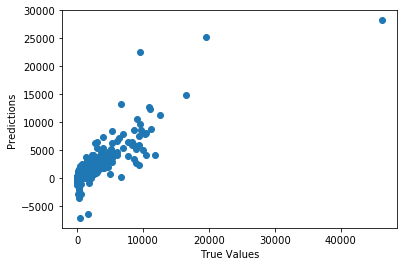

Predict  share
Trial run - Score: 0.788398653783


/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Cross-validated scores: [ 0.77239694  0.81743226  0.81118261  0.82001008  0.86901937  0.78413873
  0.78497755  0.26114826  0.41077002  0.69332535]
Mean accuracy =  0.702440118775
Cross-Predicted Accuracy (R2): 0.695993394052
Mean Absolute Error:  132.31779224
Mean values:  287.1133732642153  | percent error:  0.460855552409
Testing for clicks!
(29784, 10) (29784,)
(7447, 10) (7447,)


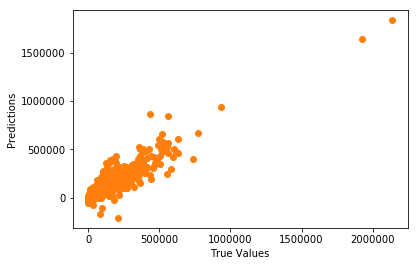

Predict  clicks
Trial run - Score: 0.89306069122
Cross-validated scores: [ 0.86305353  0.92634969  0.89752295  0.90288274  0.9266008   0.90830854
  0.89687477  0.56313511  0.77972643  0.88390642]
Mean accuracy =  0.8548360965
Cross-Predicted Accuracy (R2): 0.860815935972
Mean Absolute Error:  8191.93126326
Mean values:  26589.06833015498  | percent error:  0.308093956567
                                               0          0
0   ext_table1_consumptions_by_type__link_clicks   2.639346
1  ext_table1_consumptions_by_type__other_clicks  -0.092743
2                ext_table1_reactions_like_total   9.334778
3     ext_table1_stories_by_action_type__comment   6.441142
4        ext_table1_stories_by_action_type__like  -5.882835
5       ext_table1_stories_by_action_type__share  45.733976
6                         ext_table1_engaged_fan   1.334281
7                           ext_table1_fan_reach   0.723942
8                         ext_table1_impressions  -0.284538
9                     ext_

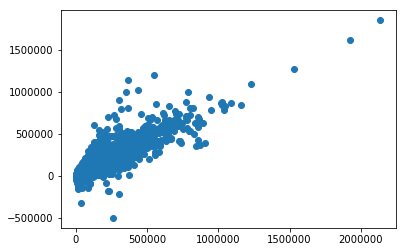

In [5]:
###PREDICTION: Cross-validation
train = all_df
##drop dups
train = train.sort_values('ext_table1_firsthour_stats_date', ascending = False).drop_duplicates(subset=['buzz_post_buzz_id', 'ext_external_id'], keep = 'last')

print("Without cross-promotion features")

features = [
       'ext_table1_consumptions_by_type__link_clicks',
       'ext_table1_consumptions_by_type__other_clicks',
       'ext_table1_reactions_like_total',
       'ext_table1_stories_by_action_type__comment',
       'ext_table1_stories_by_action_type__like',
       'ext_table1_stories_by_action_type__share', 'ext_table1_engaged_fan',
       'ext_table1_fan_reach', 'ext_table1_impressions',
       'ext_table1_impressions_fan',
               ]
# alt_inf = len(all_pages) + 1
# train = train.replace(math.inf, alt_inf)

# ####add the category variable for each of the pages in col_pages
# for pg in all_pages:
#     features.append(pg)

###generate DFs for analysis - X and Y
df = train[features]

y_clicks = train['ext_twodays_consumptions_by_type__link_clicks']
y_share = train['ext_twodays_stories_by_action_type__share']

metric = 'share'
# metric = 'clicks'

if metric == 'share':
    y = y_share
    print("Testing for shares!")
else:
    y = y_clicks
    print("Testing for clicks!")

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)


## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

print("Predict ", metric)
print("Trial run - Score:", model.score(X_test, y_test))

###prediction with cross validation
# Necessary imports: 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# 10-fold CV
scores = cross_val_score(model, df, y, cv = 10)
print("Cross-validated scores:", scores)
print("Mean accuracy = ", scores.mean())


# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=10)
plt.scatter(y, predictions)

accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy (R2):", accuracy)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error: ", mean_absolute_error(y, predictions))
print("Mean values: ", y.mean(), " | percent error: ",  mean_absolute_error(y, predictions)/y.mean())

# metric = 'share'
metric = 'clicks'

if metric == 'share':
    y = y_share
    print("Testing for shares!")
else:
    y = y_clicks
    print("Testing for clicks!")

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)


## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

print("Predict ", metric)
print("Trial run - Score:", model.score(X_test, y_test))

###prediction with cross validation
# Necessary imports: 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# 10-fold CV
scores = cross_val_score(model, df, y, cv = 10)
print("Cross-validated scores:", scores)
print("Mean accuracy = ", scores.mean())


# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=10)
plt.scatter(y, predictions)

accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy (R2):", accuracy)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error: ", mean_absolute_error(y, predictions))
print("Mean values: ", y.mean(), " | percent error: ",  mean_absolute_error(y, predictions)/y.mean())

###get coefficients
import numpy as np
print(pd.concat([pd.DataFrame(df.columns),pd.DataFrame(np.transpose(lm.coef_))], axis = 1))

In [6]:
#####REGRESSION: without cross-promotion

train = all_df
##drop dups
train = train.sort_values('ext_table1_firsthour_stats_date', ascending = False).drop_duplicates(subset=['buzz_post_buzz_id', 'ext_external_id'], keep = 'last')

features = [
       'ext_table1_consumptions_by_type__link_clicks',
       'ext_table1_consumptions_by_type__other_clicks',
       'ext_table1_reactions_like_total',
       'ext_table1_stories_by_action_type__comment',
       'ext_table1_stories_by_action_type__like',
       'ext_table1_stories_by_action_type__share', 'ext_table1_engaged_fan',
       'ext_table1_fan_reach', 'ext_table1_impressions',
       'ext_table1_impressions_fan',
               ]

####add the category variable for each of the pages in col_pages
# for pg in all_pages:
#     features.append(pg)

###overall clicks
res = ols(y = train['ext_twodays_consumptions_by_type__link_clicks'], x = train[features])
print(res)

print('Share performance')

###24-hour share
#     res = ols(y = train['24_hours_share'], x = train[features])
#     print(res)

###overall share
res = ols(y = train['ext_twodays_stories_by_action_type__share'], x = train[features])
print(res)

/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://www.statsmodels.org/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)



-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <ext_table1_consumptions_by_type__link_clicks>
             + <ext_table1_consumptions_by_type__other_clicks> + <ext_table1_reactions_like_total>
             + <ext_table1_stories_by_action_type__comment>
             + <ext_table1_stories_by_action_type__like> + <ext_table1_stories_by_action_type__share>
             + <ext_table1_engaged_fan> + <ext_table1_fan_reach>
             + <ext_table1_impressions> + <ext_table1_impressions_fan> + <intercept>

Number of Observations:         37231
Number of Degrees of Freedom:   11

R-squared:         0.8776
Adj R-squared:     0.8776

Rmse:          23525.1397

F-stat (10, 37220): 26690.5987, p-value:     0.0000

Degrees of Freedom: model 10, resid 37220

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
---------------------------------

/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://www.statsmodels.org/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
###drop duplicate (buzz_id, external_id) pairs
# train.sort_values('ext_table1_firsthour_stats_date', ascending = False).drop_duplicates(subset=['buzz_post_buzz_id', 'ext_external_id'], keep = 'last')

In [8]:
####CROSS-PROMOTION FEATURES INCLUDED

In [9]:
df = all_df.sort_values('ext_table1_firsthour_stats_date', ascending = False).drop_duplicates(subset=['buzz_post_buzz_id', 'ext_external_id'], keep = 'last')

all_pages = list(df.buzz_account_display_name.unique())
print("Total pages considered: ", len(all_pages))

def get_cross_posted_pages(x):
        tf = df[df.buzz_post_buzz_id == x].sort_values('buzz_post_created_at', ascending = 1)
        return tf.buzz_account_display_name.unique()

df['cross_promotion_pages'] = df['buzz_post_buzz_id'].apply(get_cross_posted_pages)

def generate_cat_pages(x, y):
        if(y in x):
            return list(x).index(y) + 1
        else:
            return math.inf

###categorical features for pages where the link was shared
for pag in all_pages:
#     print("Getting for ", pag)
    df[pag] = df['cross_promotion_pages'].apply(generate_cat_pages, y = pag)

df.to_csv('jan_may_2017_links_cross_posting_info.csv', index = False)

Total pages considered:  88


WITH cross-promotion features
Testing for shares!
(29784, 98) (29784,)
(7447, 98) (7447,)


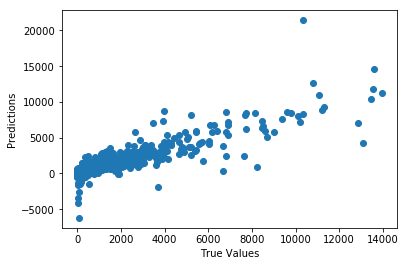

Predict  share
Trial run - Score: 0.815373889684
Cross-validated scores: [ 0.77255442  0.81754588  0.81296912  0.81793601  0.86739322  0.78776374
  0.78920426  0.2803862   0.42085858  0.69752532]
Mean accuracy =  0.706413675914
Cross-Predicted Accuracy (R2): 0.700232621178
Mean Absolute Error:  140.04687257
Mean values:  287.1133732642153  | percent error:  0.487775511734
Testing for clicks!
(29784, 98) (29784,)
(7447, 98) (7447,)


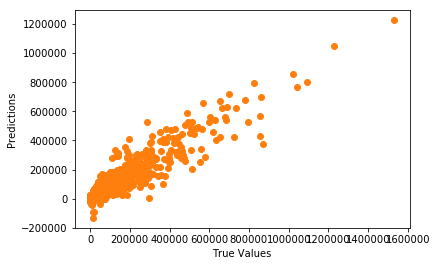

Predict  clicks
Trial run - Score: 0.895936482167
Cross-validated scores: [ 0.86673133  0.9270701   0.89800218  0.90515488  0.92865339  0.91113331
  0.89817431  0.58268658  0.78795223  0.8858342 ]
Mean accuracy =  0.859139251861
Cross-Predicted Accuracy (R2): 0.864796005025
Mean Absolute Error:  8389.1062417
Mean values:  26589.06833015498  | percent error:  0.31550959731
                                                0           0
0    ext_table1_consumptions_by_type__link_clicks    1.613988
1   ext_table1_consumptions_by_type__other_clicks   -0.888014
2                 ext_table1_reactions_like_total    8.827714
3      ext_table1_stories_by_action_type__comment    6.984470
4         ext_table1_stories_by_action_type__like   -5.794903
5        ext_table1_stories_by_action_type__share   42.119500
6                          ext_table1_engaged_fan    2.265222
7                            ext_table1_fan_reach    0.728248
8                          ext_table1_impressions   -0.209696
9    

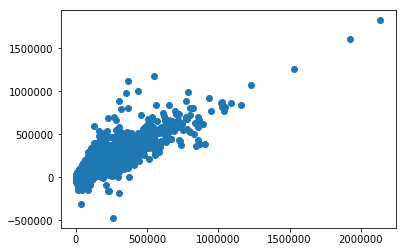

In [10]:
###PREDICTION TASK - with cross-promotion
###Cross-validation
train = pd.read_csv('jan_may_2017_links_cross_posting_info.csv')
##drop dups
# train = train.sort_values('ext_table1_firsthour_stats_date', ascending = False).drop_duplicates(subset=['buzz_post_buzz_id', 'ext_external_id'], keep = 'last')

print("WITH cross-promotion features")

features = [
       'ext_table1_consumptions_by_type__link_clicks',
       'ext_table1_consumptions_by_type__other_clicks',
       'ext_table1_reactions_like_total',
       'ext_table1_stories_by_action_type__comment',
       'ext_table1_stories_by_action_type__like',
       'ext_table1_stories_by_action_type__share', 'ext_table1_engaged_fan',
       'ext_table1_fan_reach', 'ext_table1_impressions',
       'ext_table1_impressions_fan',
               ]

alt_inf = len(all_pages) + 1
train = train.replace(math.inf, alt_inf)

# ####add the category variable for each of the pages in col_pages
for pg in all_pages:
    features.append(pg)

###generate DFs for analysis - X and Y
df = train[features]

y_clicks = train['ext_twodays_consumptions_by_type__link_clicks']
y_share = train['ext_twodays_stories_by_action_type__share']

metric = 'share'
# metric = 'clicks'

if metric == 'share':
    y = y_share
    print("Testing for shares!")
else:
    y = y_clicks
    print("Testing for clicks!")

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)


## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

print("Predict ", metric)
print("Trial run - Score:", model.score(X_test, y_test))

###prediction with cross validation
# Necessary imports: 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# 10-fold CV
scores = cross_val_score(model, df, y, cv = 10)
print("Cross-validated scores:", scores)
print("Mean accuracy = ", scores.mean())


# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=10)
plt.scatter(y, predictions)

accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy (R2):", accuracy)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error: ", mean_absolute_error(y, predictions))
print("Mean values: ", y.mean(), " | percent error: ",  mean_absolute_error(y, predictions)/y.mean())

# metric = 'share'
metric = 'clicks'

if metric == 'share':
    y = y_share
    print("Testing for shares!")
else:
    y = y_clicks
    print("Testing for clicks!")

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)


## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

print("Predict ", metric)
print("Trial run - Score:", model.score(X_test, y_test))

###prediction with cross validation
# Necessary imports: 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# 10-fold CV
scores = cross_val_score(model, df, y, cv = 10)
print("Cross-validated scores:", scores)
print("Mean accuracy = ", scores.mean())


# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=10)
plt.scatter(y, predictions)

accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy (R2):", accuracy)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error: ", mean_absolute_error(y, predictions))
print("Mean values: ", y.mean(), " | percent error: ",  mean_absolute_error(y, predictions)/y.mean())
###get coefficients
import numpy as np
print(pd.concat([pd.DataFrame(df.columns),pd.DataFrame(np.transpose(lm.coef_))], axis = 1))

In [93]:
#####REGRESSION: WITH cross-promotion
train = pd.read_csv('jan_may_2017_links_cross_posting_info.csv')
##drop dups
# train = train.sort_values('ext_table1_firsthour_stats_date', ascending = False).drop_duplicates(subset=['buzz_post_buzz_id', 'ext_external_id'], keep = 'last')

print("WITH cross-promotion features")

features = [
       'ext_table1_consumptions_by_type__link_clicks',
       'ext_table1_consumptions_by_type__other_clicks',
       'ext_table1_reactions_like_total',
       'ext_table1_stories_by_action_type__comment',
       'ext_table1_stories_by_action_type__like',
       'ext_table1_stories_by_action_type__share', 'ext_table1_engaged_fan',
       'ext_table1_fan_reach', 'ext_table1_impressions',
       'ext_table1_impressions_fan',
               ]
8
alt_inf = len(all_pages) + 1
train = train.replace(math.inf, alt_inf)

# ####add the category variable for each of the pages in col_pages
for pg in all_pages:
    features.append(pg)

###overall clicks
res = ols(y = train['ext_twodays_consumptions_by_type__link_clicks'], x = train[features])
print(res)

print('Share performance')

###24-hour share
#     res = ols(y = train['24_hours_share'], x = train[features])
#     print(res)

###overall share
res = ols(y = train['ext_twodays_stories_by_action_type__share'], x = train[features])
print(res)

WITH cross-promotion features


/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://www.statsmodels.org/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)



-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <ext_table1_consumptions_by_type__link_clicks>
             + <ext_table1_consumptions_by_type__other_clicks> + <ext_table1_reactions_like_total>
             + <ext_table1_stories_by_action_type__comment>
             + <ext_table1_stories_by_action_type__like> + <ext_table1_stories_by_action_type__share>
             + <ext_table1_engaged_fan> + <ext_table1_fan_reach>
             + <ext_table1_impressions> + <ext_table1_impressions_fan> + <BuzzFeed Quiz>
             + <BuzzFeed Japan> + <BuzzFeed UK> + <BuzzFeed Brasil> + <BuzzFeed Japan News>
             + <BuzzFeed Deutschland> + <BuzzFeed News> + <BuzzFeed>
             + <BuzzFeed Canada> + <BuzzFeed Video> + <Cocoa Butter>
             + <BuzzFeed Oz Politics> + <Quizzes En Español> + <Obsessed by BuzzFeed>
             + <BuzzFeed News BR> + <Buy Me That> + <BuzzFeed UK Politics> + <BuzzFeed Australia>
             + <BuzzFeed Rew

In [99]:
y.mean()

26589.06833015498

In [125]:
for sample in all_df['buzz_post_buzz_id'][5:6]:
    t = all_df[all_df.buzz_post_buzz_id == sample]

In [134]:
t.sort_values('buzz_post_created_at')[:10]

,buzz_external_id,buzz_post_parent_external_id,buzz_post_created_at,buzz_account_display_name,buzz_post_type_name,buzz_post_buzz_id,buzz_campaign_uri,buzz_campaign_name,ext_table1_stats_date,ext_external_id,...,ext_table1_stories_by_action_type__like,ext_table1_stories_by_action_type__share,ext_table1_engaged_fan,ext_table1_fan_reach,ext_table1_impressions,ext_table1_impressions_fan,ext_table1_firsthour_stats_date,ext_twodays_consumptions_by_type__link_clicks,ext_twodays_stories_by_action_type__share,ext_twodays_stats_date
12,254018121357088_1280495785375978,0.0,2017-02-18 03:18:26.856946,BuzzFeed Style,link,4467070,the-front-row-of-nyfw-now-vs-10-years-ago,The Front Row Of NYFW Now Vs. 10 Years Ago,2017-02-18 03:20:04 UTC,254018121357088_1280495785375978,...,297.0,21.0,7753,74370,102726,99577,2017-02-18 04:20:05 UTC,73245.0,115.0,2017-02-20 04:01:28 UTC
18226,254018121357088_1280495785375978,0.0,2017-02-18 03:18:26.856946,BuzzFeed Style,link,4467070,the-front-row-of-nyfw-now-vs-10-years-ago,The Front Row Of NYFW Now Vs. 10 Years Ago,2017-02-18 03:20:04 UTC,254018121357088_1280495785375978,...,297.0,21.0,7753,74370,102726,99577,2017-02-18 04:20:05 UTC,73281.0,115.0,2017-02-20 04:15:07 UTC
4,280467515620435_418827981784387,0.0,2017-02-18 05:27:11.699785,Obsessed by BuzzFeed,link,4467070,the-front-row-of-nyfw-now-vs-10-years-ago,The Front Row Of NYFW Now Vs. 10 Years Ago,2017-02-18 04:45:07 UTC,280467515620435_418827981784387,...,12.0,5.0,564,5735,7950,7771,2017-02-18 05:45:08 UTC,5434.0,14.0,2017-02-20 05:30:18 UTC
5,280467515620435_418827981784387,0.0,2017-02-18 05:27:11.699785,Obsessed by BuzzFeed,link,4467070,the-front-row-of-nyfw-now-vs-10-years-ago,The Front Row Of NYFW Now Vs. 10 Years Ago,2017-02-18 04:45:07 UTC,280467515620435_418827981784387,...,12.0,5.0,564,5735,7950,7771,2017-02-18 05:45:06 UTC,5434.0,14.0,2017-02-20 05:30:18 UTC
9360,280467515620435_418827981784387,0.0,2017-02-18 05:27:11.699785,Obsessed by BuzzFeed,link,4467070,the-front-row-of-nyfw-now-vs-10-years-ago,The Front Row Of NYFW Now Vs. 10 Years Ago,2017-02-18 04:45:07 UTC,280467515620435_418827981784387,...,12.0,5.0,564,5735,7950,7771,2017-02-18 05:45:08 UTC,5431.0,14.0,2017-02-20 05:15:10 UTC
9361,280467515620435_418827981784387,0.0,2017-02-18 05:27:11.699785,Obsessed by BuzzFeed,link,4467070,the-front-row-of-nyfw-now-vs-10-years-ago,The Front Row Of NYFW Now Vs. 10 Years Ago,2017-02-18 04:45:07 UTC,280467515620435_418827981784387,...,12.0,5.0,564,5735,7950,7771,2017-02-18 05:45:06 UTC,5431.0,14.0,2017-02-20 05:15:10 UTC
45414,280467515620435_418827981784387,0.0,2017-02-18 05:27:11.699785,Obsessed by BuzzFeed,link,4467070,the-front-row-of-nyfw-now-vs-10-years-ago,The Front Row Of NYFW Now Vs. 10 Years Ago,2017-02-18 04:45:07 UTC,280467515620435_418827981784387,...,12.0,5.0,564,5735,7950,7771,2017-02-18 05:45:08 UTC,5429.0,14.0,2017-02-20 05:01:32 UTC
45415,280467515620435_418827981784387,0.0,2017-02-18 05:27:11.699785,Obsessed by BuzzFeed,link,4467070,the-front-row-of-nyfw-now-vs-10-years-ago,The Front Row Of NYFW Now Vs. 10 Years Ago,2017-02-18 04:45:07 UTC,280467515620435_418827981784387,...,12.0,5.0,564,5735,7950,7771,2017-02-18 05:45:06 UTC,5429.0,14.0,2017-02-20 05:01:32 UTC
14215,257431141042836_1197466950372579,0.0,2017-02-19 00:29:11.218463,BuzzFeed Rewind,link,4467070,the-front-row-of-nyfw-now-vs-10-years-ago,The Front Row Of NYFW Now Vs. 10 Years Ago,2017-02-19 00:30:06 UTC,257431141042836_1197466950372579,...,64.0,8.0,2573,31586,40832,39826,2017-02-19 01:30:05 UTC,23343.0,57.0,2017-02-21 01:02:52 UTC
23013,257431141042836_1197466950372579,0.0,2017-02-19 00:29:11.218463,BuzzFeed Rewind,link,4467070,the-front-row-of-nyfw-now-vs-10-years-ago,The Front Row Of NYFW Now Vs. 10 Years Ago,2017-02-19 00:30:06 UTC,257431141042836_1197466950372579,...,64.0,8.0,2573,31586,40832,39826,2017-02-19 01:30:05 UTC,23344.0,57.0,2017-02-21 01:15:07 UTC


In [119]:
train[all_df.buzz_post_buzz_id == sample].sort_values('ext_table1_firsthour_stats_date')['ext_table1_consumptions_by_type__link_clicks']

/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


18226     7976.0
9361       628.0
14215     2746.0
21213    47957.0
10482     1663.0
Name: ext_table1_consumptions_by_type__link_clicks, dtype: float64

In [120]:
train[all_df.buzz_post_buzz_id == sample].sort_values('ext_table1_firsthour_stats_date')['ext_twodays_stories_by_action_type__share']

/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


18226    115.0
9361      14.0
14215     57.0
21213    157.0
10482     21.0
Name: ext_twodays_stories_by_action_type__share, dtype: float64

In [122]:
sample

4467070

WITH cross-promotion features
Testing for shares!
(29784, 98) (29784,)
(7447, 98) (7447,)


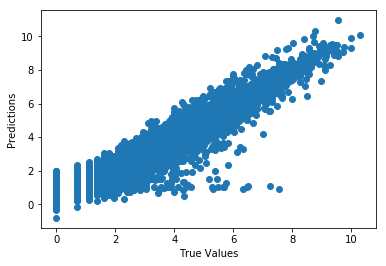

Predict  share
Trial run - Score: 0.904481280764
Cross-validated scores: [ 0.92059344  0.91951683  0.91061283  0.92046387  0.90276891  0.84674781
  0.87447005  0.86826673  0.90148528  0.90815865]
Mean accuracy =  0.897308439345
Cross-Predicted Accuracy (R2): 0.455529315632
Mean Absolute Error:  120.432294303
Mean values:  287.1133732642153  | percent error:  0.419459020434
Testing for clicks!
(29784, 98) (29784,)
(7447, 98) (7447,)


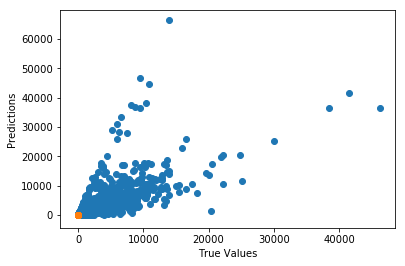

Predict  clicks
Trial run - Score: 0.907755566848
Cross-validated scores: [ 0.94215752  0.94075829  0.90645149  0.93957797  0.87895369  0.82804802
  0.84025257  0.85839203  0.93221855  0.92886683]
Mean accuracy =  0.899567695025
Cross-Predicted Accuracy (R2): 0.718131923118
Mean Absolute Error:  8189.26699727
Mean values:  26589.06833015498  | percent error:  0.307993755012
                                                0         0
0    ext_table1_consumptions_by_type__link_clicks  1.030929
1   ext_table1_consumptions_by_type__other_clicks -0.002221
2                 ext_table1_reactions_like_total -0.046522
3      ext_table1_stories_by_action_type__comment -0.024906
4         ext_table1_stories_by_action_type__like  0.041502
5        ext_table1_stories_by_action_type__share  0.024102
6                          ext_table1_engaged_fan -0.071668
7                            ext_table1_fan_reach  1.787537
8                          ext_table1_impressions -0.464267
9                      

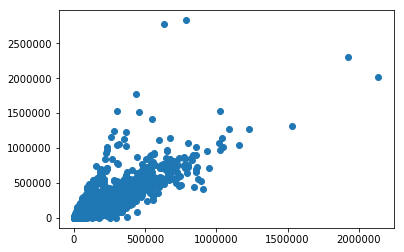

In [142]:
############ LOG SCALING - 
###PREDICTION TASK - with cross-promotion
###Cross-validation
train = pd.read_csv('jan_may_2017_links_cross_posting_info.csv')
##drop dups
# train = train.sort_values('ext_table1_firsthour_stats_date', ascending = False).drop_duplicates(subset=['buzz_post_buzz_id', 'ext_external_id'], keep = 'last')

print("WITH cross-promotion features")

features = [
       'ext_table1_consumptions_by_type__link_clicks',
       'ext_table1_consumptions_by_type__other_clicks',
       'ext_table1_reactions_like_total',
       'ext_table1_stories_by_action_type__comment',
       'ext_table1_stories_by_action_type__like',
       'ext_table1_stories_by_action_type__share', 'ext_table1_engaged_fan',
       'ext_table1_fan_reach', 'ext_table1_impressions',
       'ext_table1_impressions_fan',
        ]

###convert to log-scale
for feat in features:
    train[feat] = np.log(train[feat]+1)

alt_inf = len(all_pages) + 1
train = train.replace(math.inf, alt_inf)

# ####add the category variable for each of the pages in col_pages
for pg in all_pages:
    features.append(pg)

###generate DFs for analysis - X and Y
df = train[features]

y_clicks = np.log(train['ext_twodays_consumptions_by_type__link_clicks'] + 1)
y_share = np.log(train['ext_twodays_stories_by_action_type__share'] + 1)

metric = 'share'
# metric = 'clicks'

if metric == 'share':
    y = y_share
    print("Testing for shares!")
else:
    y = y_clicks
    print("Testing for clicks!")

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)


## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

print("Predict ", metric)
print("Trial run - Score:", model.score(X_test, y_test))

###prediction with cross validation
# Necessary imports: 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# 10-fold CV
scores = cross_val_score(model, df, y, cv = 10)
print("Cross-validated scores:", scores)
print("Mean accuracy = ", scores.mean())


# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=10)

###CONVERT FROM LOG TO EXPONENTS - 
y = np.exp(y) - 1
predictions = np.exp(predictions) - 1


plt.scatter(y, predictions)

accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy (R2):", accuracy)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error: ", mean_absolute_error(y, predictions))
print("Mean values: ", y.mean(), " | percent error: ",  mean_absolute_error(y, predictions)/y.mean())

# metric = 'share'
metric = 'clicks'

if metric == 'share':
    y = y_share
    print("Testing for shares!")
else:
    y = y_clicks
    print("Testing for clicks!")

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)


## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

print("Predict ", metric)
print("Trial run - Score:", model.score(X_test, y_test))

###prediction with cross validation
# Necessary imports: 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# 10-fold CV
scores = cross_val_score(model, df, y, cv = 10)
print("Cross-validated scores:", scores)
print("Mean accuracy = ", scores.mean())


# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=10)

###CONVERT FROM LOG TO EXPONENTS - 
y = np.exp(y) - 1
predictions = np.exp(predictions) - 1
######


plt.scatter(y, predictions)

accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy (R2):", accuracy)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error: ", mean_absolute_error(y, predictions))
print("Mean values: ", y.mean(), " | percent error: ",  mean_absolute_error(y, predictions)/y.mean())
###get coefficients
import numpy as np
print(pd.concat([pd.DataFrame(df.columns),pd.DataFrame(np.transpose(lm.coef_))], axis = 1))

In [1]:
####buckets - classification

In [12]:
train = pd.read_csv('jan_may_2017_links_cross_posting_info.csv')

In [18]:
# ext_twodays_consumptions_by_type__link_clicks
# ext_twodays_stories_by_action_type__share
train['ext_twodays_consumptions_by_type__link_clicks'].mean(), train['ext_twodays_consumptions_by_type__link_clicks'].min(), train['ext_twodays_consumptions_by_type__link_clicks'].max()

(26589.06833015498, 0.0, 2138396.0)

In [20]:
100*train['ext_twodays_consumptions_by_type__link_clicks'].mean()/train['ext_twodays_consumptions_by_type__link_clicks'].max()

1.2434118063331103

In [27]:
train['clicks_bucket'] = np.log(train['ext_twodays_consumptions_by_type__link_clicks']+1).astype(int)
train['share_bucket'] = np.log(train['ext_twodays_stories_by_action_type__share']+1).astype(int)

In [13]:
#####CLASSIFICATION
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

train = pd.read_csv('jan_may_2017_links_cross_posting_info.csv')

# subsample = 1
subsample = 0

if subsample == 1:
    train = train[:1000]

print("WITH cross-promotion features")

features = [
       'ext_table1_consumptions_by_type__link_clicks',
       'ext_table1_consumptions_by_type__other_clicks',
       'ext_table1_reactions_like_total',
       'ext_table1_stories_by_action_type__comment',
       'ext_table1_stories_by_action_type__like',
       'ext_table1_stories_by_action_type__share', 'ext_table1_engaged_fan',
       'ext_table1_fan_reach', 'ext_table1_impressions',
       'ext_table1_impressions_fan',
        ]

###convert to log-scale
for feat in features:
    train[feat] = np.log(train[feat]+1)

alt_inf = len(all_pages) + 1
train = train.replace(math.inf, alt_inf)

# ####add the category variable for each of the pages in col_pages
for pg in all_pages:
    features.append(pg)

###generate DFs for analysis - X and Y
df = train[features]

X = df

train['clicks_bucket'] = np.log(train['ext_twodays_consumptions_by_type__link_clicks']+1).astype(int)
train['share_bucket'] = np.log(train['ext_twodays_stories_by_action_type__share']+1).astype(int)

y_clicks = train['clicks_bucket']
y_share = train['share_bucket']

metric = 'share'
# metric = 'clicks'

if metric == 'share':
    y = y_share
    print("Testing for shares!")
else:
    y = y_clicks
    print("Testing for clicks!")

cv = 2
nb_alpha = 0.01
# classifier = 'svm'
# classifier = 'nb'
classifier = 'logit'
# classifier ='rf'
logit_c = 1e5

####classifier
# clf = LinearSVC(C=1)
if classifier == 'nb':
    clf = MultinomialNB(alpha = nb_alpha)
if classifier == 'logit':
    clf = linear_model.LogisticRegression(C=logit_c)
#   Try penalty='l2' and 'l1'
if classifier == 'rf':
    clf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
else:
    clf = svm.SVC(kernel='linear')
    ###try different kernels

predicted = cross_val_predict(clf, X, y, cv=cv)
scores = metrics.accuracy_score(y, predicted)
# scores = cross_val_score(clf, X, y, cv = 10)
# print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("Accuracy: ", scores)

# metric = 'share'
metric = 'clicks'

if metric == 'share':
    y = y_share
    print("Testing for shares!")
else:
    y = y_clicks
    print("Testing for clicks!")

####classifier
# clf = LinearSVC(C=1)
if classifier == 'nb':
    clf = MultinomialNB(alpha = nb_alpha)
if classifier == 'logit':
    clf = linear_model.LogisticRegression(C=logit_c)
#   Try penalty='l2' and 'l1'
if classifier == 'rf':
    clf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
else:
    clf = svm.SVC(kernel='linear')
    ###try different kernels

predicted = cross_val_predict(clf, X, y, cv=cv)
scores = metrics.accuracy_score(y, predicted)
# scores = cross_val_score(clf, X, y, cv = 10)
# print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("Accuracy: ", scores)

WITH cross-promotion features
Testing for shares!
Accuracy:  0.618973436115
Testing for clicks!
Accuracy:  0.671590878569


In [ ]:
# scores = cross_val_score(clf, X, y, cv = 10)
# print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [65]:
l = pd.DataFrame(y)
l['prediction'] = predicted

In [66]:
l[l['clicks_bucket'] == 10]

,clicks_bucket,prediction
7,10,11
18,10,11
39,10,11
57,10,8
59,10,9
61,10,9
64,10,12
70,10,12
81,10,8
86,10,8


In [69]:
l.max()

clicks_bucket    14
prediction       14
dtype: int64

In [19]:
print(1)

1


In [14]:
clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
##### LOW, MEDIUM, HIGH classification - 

#####
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
import math

train = pd.read_csv('jan_may_2017_links_cross_posting_info.csv')
all_pages = list(train.buzz_account_display_name.unique())

# subsample = 1
subsample = 0

if subsample == 1:
    train = train[:1000]

print("WITH cross-promotion features")

features = [
       'ext_table1_consumptions_by_type__link_clicks',
       'ext_table1_consumptions_by_type__other_clicks',
       'ext_table1_reactions_like_total',
       'ext_table1_stories_by_action_type__comment',
       'ext_table1_stories_by_action_type__like',
       'ext_table1_stories_by_action_type__share', 'ext_table1_engaged_fan',
       'ext_table1_fan_reach', 'ext_table1_impressions',
       'ext_table1_impressions_fan',
        ]

###convert to log-scale
for feat in features:
    train[feat] = np.log(train[feat]+1)

alt_inf = len(all_pages) + 1
train = train.replace(math.inf, alt_inf)

# ####add the category variable for each of the pages in col_pages
for pg in all_pages:
    features.append(pg)

###generate DFs for analysis - X and Y
df = train[features]

X = df


####low, med, high classes;
low = 100
high = 10000

def get_class(x):
    if x < low:
        return 0
    elif x < high:
        return 1
    else:
        return 2

train['clicks_bucket'] = train['ext_twodays_consumptions_by_type__link_clicks'].apply(get_class)
train['share_bucket'] = train['ext_twodays_stories_by_action_type__share'].apply(get_class)

y_clicks = train['clicks_bucket']
y_share = train['share_bucket']

metric = 'share'
# metric = 'clicks'

if metric == 'share':
    y = y_share
    print("Testing for shares!")
else:
    y = y_clicks
    print("Testing for clicks!")

cv = 5
nb_alpha = 0.01
# classifier = 'svm'
classifier = 'nb'
# classifier = 'logit'
# classifier ='rf'
logit_c = 1e5

####classifier
# clf = LinearSVC(C=1)
if classifier == 'nb':
    clf = MultinomialNB(alpha = nb_alpha)
if classifier == 'logit':
    clf = linear_model.LogisticRegression(C=logit_c)
#   Try penalty='l2' and 'l1'
if classifier == 'rf':
    clf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
else:
    clf = svm.SVC(kernel='linear')
    ###try different kernels

# predicted = cross_val_predict(clf, X, y, cv=cv)
# scores = metrics.accuracy_score(y, predicted)
scores = cross_val_score(clf, X, y, cv = cv)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
# print("Accuracy: ", scores)

# metric = 'share'
metric = 'clicks'

if metric == 'share':
    y = y_share
    print("Testing for shares!")
else:
    y = y_clicks
    print("Testing for clicks!")

####classifier
# clf = LinearSVC(C=1)
if classifier == 'nb':
    clf = MultinomialNB(alpha = nb_alpha)
if classifier == 'logit':
    clf = linear_model.LogisticRegression(C=logit_c)
#   Try penalty='l2' and 'l1'
if classifier == 'rf':
    clf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
else:
    clf = svm.SVC(kernel='linear')
    ###try different kernels

# predicted = cross_val_predict(clf, X, y, cv=cv)
# scores = metrics.accuracy_score(y, predicted)
scores = cross_val_score(clf, X, y, cv = cv)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
# print("Accuracy: ", scores)

WITH cross-promotion features
Testing for shares!
Accuracy:  0.932985952566
Testing for clicks!
Accuracy:  0.908060487228
